In [1]:
import os
import scipy.io as sio
import scipy.misc as smisc
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
import cv2

In [3]:
datacube = np.load('/srv/home/chenyu/DEbackup/2019/120119/S1/Registered_datacube.npy')
print(datacube.shape)

(24, 100, 1000, 1000)


(-0.5, 97.5, 21.5, -0.5)

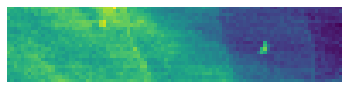

In [4]:
plt.imshow(np.sum(np.sum(datacube,axis=2),axis=2)[1:-1:,1:-1])
plt.axis('off')

In [11]:
# Ignore the very first row to avoid artifact caused by shutter
k_size = 150
datacube_3D = np.zeros((datacube.shape[0], datacube.shape[1], k_size*k_size))
for irow in range(datacube.shape[0]):
    for icol in range(datacube.shape[1]):
        sample = datacube[irow,icol,:,:]
        resized = cv2.resize(sample,(k_size,k_size),interpolation = cv2.INTER_AREA) # resize into 16x16
        resized = resized / np.sum(resized) * np.sum(sample)
        resized = resized / 224
        datacube_3D[irow,icol,:] = np.reshape(resized,k_size*k_size).astype(int)

datacube_3D = datacube_3D[1:-1,1:-1,:] # crop the first row and first column
# save as npy file as file would be too large for a typical matlab .mat file
np.save('/srv/home/chenyu/TensorDenoise/Experiment/WS2_23x100x22500_realspace.npy',datacube_3D)


/srv/home/chenyu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [13]:
# save as Matlab .mat file
# Create a dictionary
adict = {}
adict['datacube'] = datacube_3D
sio.savemat('/srv/home/chenyu/TensorDenoise/Experiment/WS2_23x100x22500_realspace.mat', adict)

In [5]:
datacube = sio.loadmat('/srv/home/chenyu/TensorDenoise/Experiment/WS2_23x100x22500_realspace.mat')
datacube = datacube['datacube']

In [6]:
print(datacube.shape)

(22, 98, 22500)


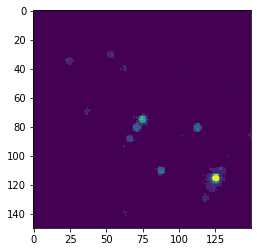

In [7]:
plt.imshow(datacube[10,10,:].reshape(150,150))